TIMESERIES ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
timeseries_data=pd.read_csv('/content/drive/MyDrive/ARECANUT_TIMESERIES_PRICE_DATA_2001-2023.csv')
timeseries_data

,month,value
0,2002-04-01,6244.49
1,2002-05-01,6265.38
2,2002-06-01,6870.24
3,2002-07-01,8991.53
4,2002-08-01,4865.00
...,...,...
254,2023-07-01,45531.73
255,2023-08-01,43602.64
256,2023-09-01,44407.73
257,2023-10-01,42625.35


In [4]:
timeseries_data['month']=pd.to_datetime(timeseries_data['month'])
timeseries_data

,month,value
0,2002-04-01,6244.49
1,2002-05-01,6265.38
2,2002-06-01,6870.24
3,2002-07-01,8991.53
4,2002-08-01,4865.00
...,...,...
254,2023-07-01,45531.73
255,2023-08-01,43602.64
256,2023-09-01,44407.73
257,2023-10-01,42625.35


CHANGING STRING TIME TO TIME

In [5]:
timeseries_data=timeseries_data.set_index('month')

In [6]:
timeseries_data

,value
month,
2002-04-01,6244.49
2002-05-01,6265.38
2002-06-01,6870.24
2002-07-01,8991.53
2002-08-01,4865.00
...,...
2023-07-01,45531.73
2023-08-01,43602.64
2023-09-01,44407.73


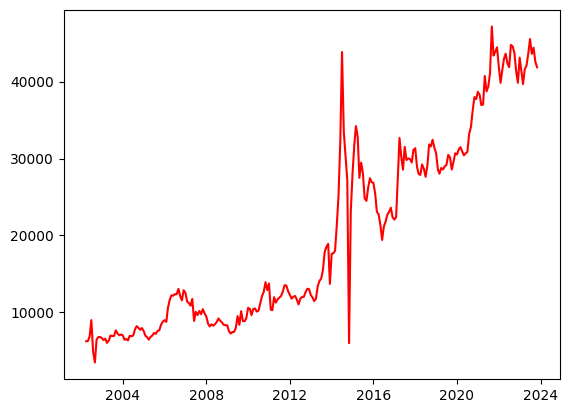

In [7]:
plt.plot(timeseries_data['value'],'-r')
plt.show()

MOVING AVERAGE USING PANDAS

In [8]:
timeseries_movingaverage=timeseries_data['value'].rolling(window=3).mean()

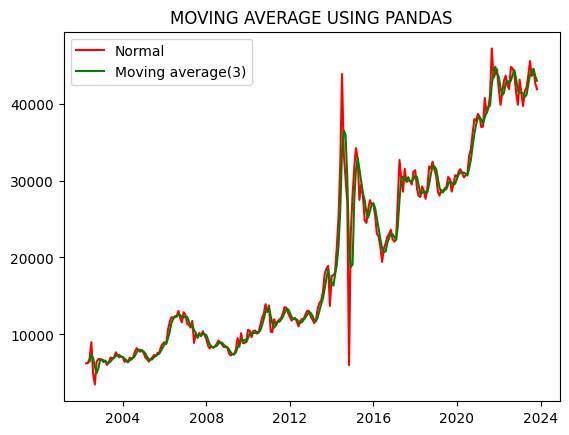

In [9]:
plt.title("MOVING AVERAGE USING PANDAS")
plt.plot(timeseries_data['value'],'-r')
plt.plot(timeseries_movingaverage,'-g')
plt.legend(['Normal','Moving average(3)'])
plt.show()

MOVING AVERAGE USING OWN FUNCTION

In [10]:
dataforprediction=timeseries_data['value'].tolist()

In [11]:
def predict_movingavearge(data,ma_value):
  predicted_values=[]
  for i in range(ma_value):
    predicted_values.append(np.nan)

  for i in range(len(data)-2):
    mean=(data[i]+(data[i+1])+(data[i+2]))/(ma_value)
    predicted_values.append(mean)
  return predicted_values

In [12]:
prediction=predict_movingavearge(dataforprediction,3)

In [13]:
prediction.pop()

42966.07666666667

In [14]:
len(prediction)

259

In [15]:
timeseries_data['predicted']=prediction

In [16]:
timeseries_data

,value,predicted
month,,
2002-04-01,6244.49,NaN
2002-05-01,6265.38,NaN
2002-06-01,6870.24,NaN
2002-07-01,8991.53,6460.036667
2002-08-01,4865.00,7375.716667
...,...,...
2023-07-01,45531.73,42463.210000
2023-08-01,43602.64,43762.590000
2023-09-01,44407.73,44267.923333


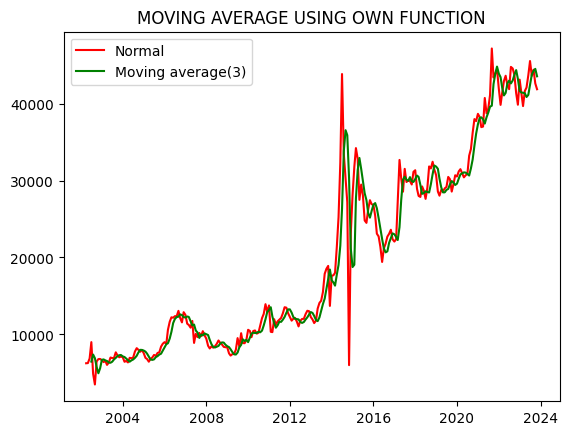

In [17]:
plt.title("MOVING AVERAGE USING OWN FUNCTION")
plt.plot(timeseries_data['value'],'-r')
plt.plot(timeseries_data['predicted'],'-g')
plt.legend(['Normal','Moving average(3)'])
plt.show()

AUTO REGRESSION

ONLY UNIVARIATE DATA IN AUTOREGRESSION

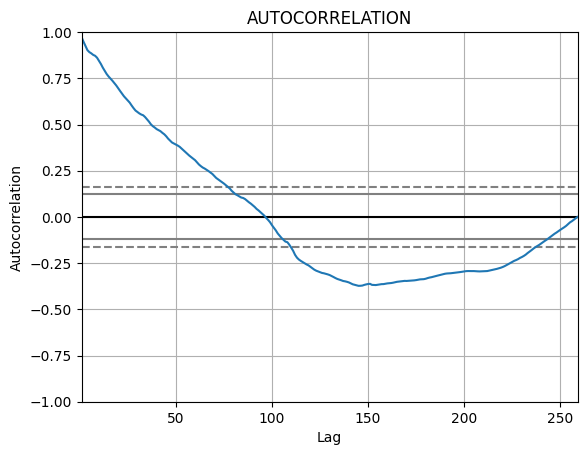

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(timeseries_data['value'])
plt.title("AUTOCORRELATION")
plt.show()

AUTO REGRESSION

In [19]:
from statsmodels.tsa.ar_model import AutoReg

In [20]:
data=timeseries_data['value'].values

In [21]:
train,test=data[:170],data[170:]

In [22]:
test.shape

(89,)

In [23]:
model=AutoReg(train,lags=3)
model_fit=model.fit()

In [24]:
model_predict = model_fit.predict(start=0, end=len(data),dynamic=False)

In [25]:
len(model_predict)

260

In [26]:
model_predict=model_predict.tolist()
model_predict.pop()

14175.698402633967

In [27]:
timeseries_data['auto_regressive_prediction']=model_predict

In [28]:
timeseries_data

,value,predicted,auto_regressive_prediction
month,,,
2002-04-01,6244.49,NaN,NaN
2002-05-01,6265.38,NaN,NaN
2002-06-01,6870.24,NaN,NaN
2002-07-01,8991.53,6460.036667,7287.500010
2002-08-01,4865.00,7375.716667,9105.964937
...,...,...,...
2023-07-01,45531.73,42463.210000,14187.946724
2023-08-01,43602.64,43762.590000,14185.198434
2023-09-01,44407.73,44267.923333,14182.608300


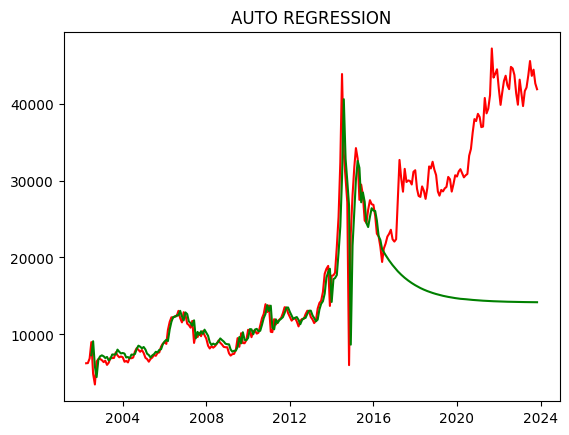

In [29]:
plt.title("AUTO REGRESSION")
plt.plot(timeseries_data['value'],'-r')
plt.plot(timeseries_data['auto_regressive_prediction'],'-g')
plt.show()

ARIMA MODEL

In [30]:
timeseries_data['seasonal_diff']=timeseries_data['value']-timeseries_data['value'].shift(3)

In [34]:
timeseries_data['seasonal_diff'].dropna(inplace=True)

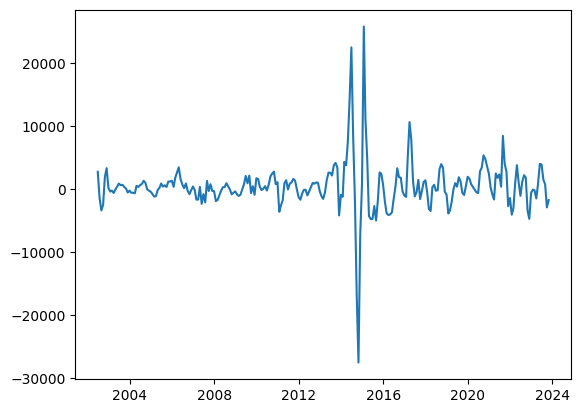

In [36]:
plt.plot(timeseries_data['seasonal_diff'])
plt.show()

In [37]:
from statsmodels.tsa.stattools import adfuller
adtest=adfuller(timeseries_data['seasonal_diff'].dropna())
print('p-value : ',adtest[1])

p-value :  0.00019586975822049175


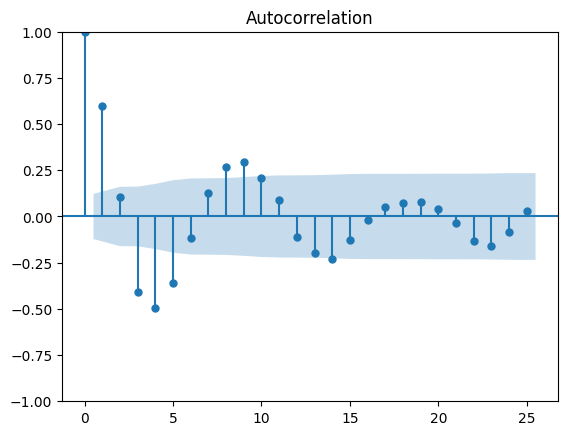

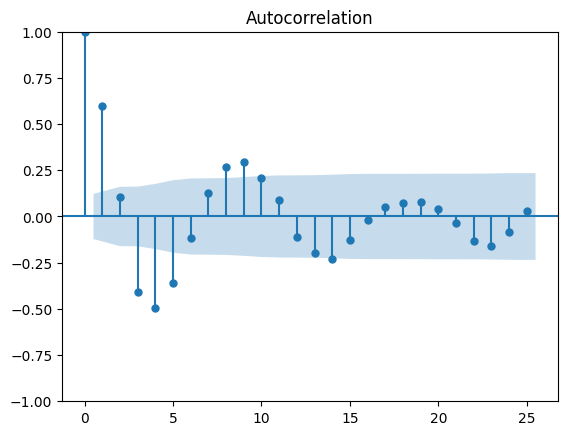

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(timeseries_data['seasonal_diff'].dropna())

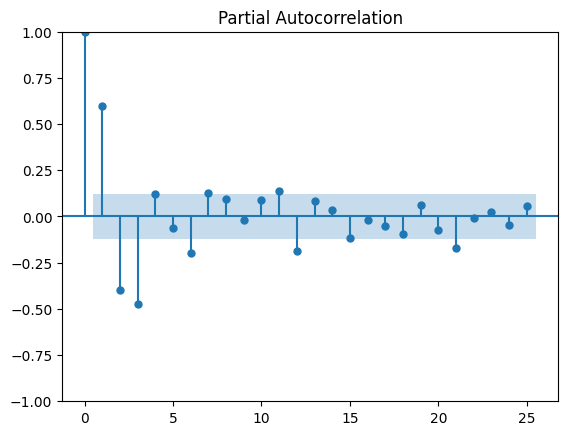

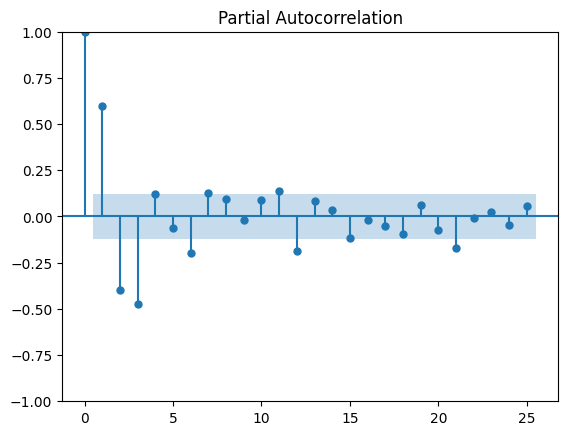

In [39]:
plot_pacf(timeseries_data['seasonal_diff'].dropna())

In [47]:
from statsmodels.tsa.arima.model import ARIMA
model1=ARIMA(timeseries_data['value'].dropna(),order=(4,3,0))
model=model1.fit()
model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                  259
Model:                 ARIMA(4, 3, 0)   Log Likelihood               -2457.716
Date:                Sun, 18 Feb 2024   AIC                           4925.432
Time:                        06:14:38   BIC                           4943.158
Sample:                             0   HQIC                          4932.561
                                - 259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2768      0.054    -23.740      0.000      -1.382      -1.171
ar.L2         -1.0669      0.084    -12.737      0.000      -1.231      -0.903
ar.L3         -0.4640      0.074     -6.262      0.000      -0.609      -0.319
ar.L4         -0.1846      0.039     -4.786      0.000      -0.260      -0.109
sigma2      1.274e+07   3.46e-09   3.68e+15      0.000    1.27e+07    1.27e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):             16623.20
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               4.54   Skew:                             2.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.86e+30. Standard errors may be unstable.
"""

In [48]:
prediction=model.predict(start=0,end=len(timeseries_data['seasonal_diff'].dropna()))
timeseries_data['prediction']=prediction
timeseries_data['prediction']

month
2002-04-01        0.000000
2002-05-01    14489.518526
2002-06-01     9069.720107
2002-07-01     8974.098939
2002-08-01     8893.843518
                  ...     
2023-07-01    45889.685874
2023-08-01    47685.954760
2023-09-01    43695.840290
2023-10-01             NaN
2023-11-01             NaN
Name: prediction, Length: 259, dtype: float64

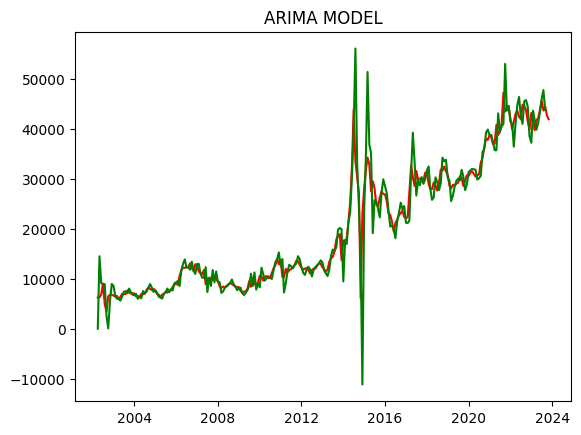

In [49]:
plt.title("ARIMA MODEL")
plt.plot(timeseries_data['value'],'-r')
plt.plot(timeseries_data['prediction'],'-g')
plt.show()